In [7]:
import pandas as pd
import glob
import os

# Path where your CSVs are stored
folder_path = r"E:\\Sakthi\\prasanth\\projects\\imdb\\Scripts"

# List of CSV files for the genres you have
csv_files = [
    "action_movies.csv",
    "comedy_movies.csv",
    "crime_movies.csv",
    "drama_movies.csv",
    "adventure_movies.csv" 
]

# Read and combine them
dfs = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        dfs.append(df)
    else:
        print(f"File not found: {file_path}")

# Concatenate all into one DataFrame
if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)

    # Save as all_genres.csv in the same folder
    output_path = os.path.join(folder_path, "all_genres.csv")
    combined_df.to_csv(output_path, index=False)
    print(f"Combined CSV saved as: {output_path}")
else:
    print("No CSV files found to combine.")


Combined CSV saved as: E:\\Sakthi\\prasanth\\projects\\imdb\\Scripts\all_genres.csv


In [64]:
import pandas as pd
df= pd.read_csv('E:\\Sakthi\\prasanth\\projects\\imdb\\Scripts\\all_genres.csv')
print(df.head())


    Genre             Movie Name Duration  Duration Minutes  Rating     Votes
0  Action      Kraven the Hunter    2h 7m             127.0     5.5   52000.0
1  Action           Gladiator II   2h 28m             148.0     6.5  224000.0
2  Action               Twisters    2h 2m             122.0     6.5  165000.0
3  Action   Sonic the Hedgehog 3   1h 50m             110.0     6.9   56000.0
4  Action  Venom: The Last Dance   1h 50m             110.0     6.0  114000.0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2489 entries, 0 to 2488
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Genre             2489 non-null   object 
 1   Movie Name        2489 non-null   object 
 2   Duration          2489 non-null   object 
 3   Duration Minutes  2316 non-null   float64
 4   Rating            2343 non-null   float64
 5   Votes             2343 non-null   float64
dtypes: float64(3), object(3)
memory usage: 116.8+ KB


In [66]:
df.isnull().sum()

Genre                 0
Movie Name            0
Duration              0
Duration Minutes    173
Rating              146
Votes               146
dtype: int64

Handling NaN values in Rating, Votes and Duration Minutes 

In [67]:
# Fill missing ratings with average per genre
df['Rating'] = df['Rating'].fillna(df.groupby('Genre')['Rating'].transform('mean'))

<Axes: >

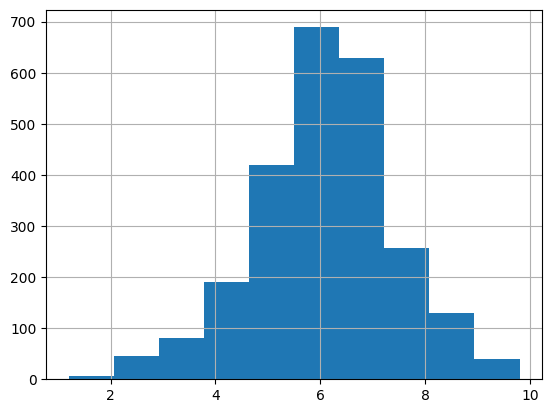

In [68]:
df['Rating'].hist()

In [69]:
df.isnull().sum()

Genre                 0
Movie Name            0
Duration              0
Duration Minutes    173
Rating                0
Votes               146
dtype: int64

In [70]:
# Fill missing votes with average per genre
df['Votes'] = df['Votes'].fillna(df.groupby('Genre')['Votes'].transform('mean'))

In [71]:
df.isnull().sum()

Genre                 0
Movie Name            0
Duration              0
Duration Minutes    173
Rating                0
Votes                 0
dtype: int64

<Axes: >

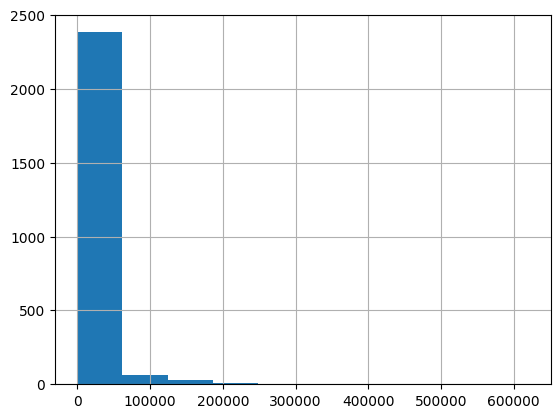

In [72]:
df['Votes'].hist()

In [73]:
votes = (df['Votes'] < 7).sum()
print(votes)


10


In [74]:
# Fill missing Duration Minutes with average per genre
df['Duration Minutes'] = df['Duration Minutes'].fillna(df.groupby('Genre')['Duration Minutes'].transform('mean'))

<Axes: >

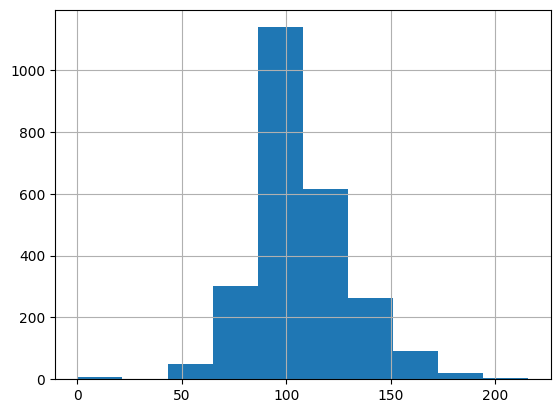

In [75]:
df['Duration Minutes'].hist()

In [76]:
df.isnull().sum()

Genre               0
Movie Name          0
Duration            0
Duration Minutes    0
Rating              0
Votes               0
dtype: int64

In [77]:
df

,Genre,Movie Name,Duration,Duration Minutes,Rating,Votes
0,Action,Kraven the Hunter,2h 7m,127.000000,5.50,52000.000000
1,Action,Gladiator II,2h 28m,148.000000,6.50,224000.000000
2,Action,Twisters,2h 2m,122.000000,6.50,165000.000000
3,Action,Sonic the Hedgehog 3,1h 50m,110.000000,6.90,56000.000000
4,Action,Venom: The Last Dance,1h 50m,110.000000,6.00,114000.000000
...,...,...,...,...,...,...
2484,Adventure,Lakeside's Mission: Impossible,1h 30m,96.927907,6.05,10871.884804
2485,Adventure,Dushu,1h 36m,96.000000,6.05,10871.884804
2486,Adventure,I crossed America with $0.01,1h 36m,96.927907,6.05,10871.884804
2487,Adventure,Upanga Kingdom,1h 55m,115.000000,6.05,10871.884804


In [78]:
df.columns = df.columns.str.lower()

In [89]:
df.columns = (
    df.columns                      
     .str.replace('movie name', 'movie_name', regex=True)  
)

df.columns = (
    df.columns                       
      .str.replace('duration minutes', 'duration_minutes', regex=True)  
)

In [84]:
df

,genre,movie_name,duration,duration_minutes,rating,votes
0,Action,Kraven the Hunter,2h 7m,127.000000,5.50,52000.000000
1,Action,Gladiator II,2h 28m,148.000000,6.50,224000.000000
2,Action,Twisters,2h 2m,122.000000,6.50,165000.000000
3,Action,Sonic the Hedgehog 3,1h 50m,110.000000,6.90,56000.000000
4,Action,Venom: The Last Dance,1h 50m,110.000000,6.00,114000.000000
...,...,...,...,...,...,...
2484,Adventure,Lakeside's Mission: Impossible,1h 30m,96.927907,6.05,10871.884804
2485,Adventure,Dushu,1h 36m,96.000000,6.05,10871.884804
2486,Adventure,I crossed America with $0.01,1h 36m,96.927907,6.05,10871.884804
2487,Adventure,Upanga Kingdom,1h 55m,115.000000,6.05,10871.884804


In [85]:
df.to_csv('processed_data.csv',index=False)

In [86]:
df = pd.read_csv('E:\Sakthi\prasanth\projects\imdb\Scripts\processed_data.csv')
display(df)

,genre,movie_name,duration,duration_minutes,rating,votes
0,Action,Kraven the Hunter,2h 7m,127.000000,5.50,52000.000000
1,Action,Gladiator II,2h 28m,148.000000,6.50,224000.000000
2,Action,Twisters,2h 2m,122.000000,6.50,165000.000000
3,Action,Sonic the Hedgehog 3,1h 50m,110.000000,6.90,56000.000000
4,Action,Venom: The Last Dance,1h 50m,110.000000,6.00,114000.000000
...,...,...,...,...,...,...
2484,Adventure,Lakeside's Mission: Impossible,1h 30m,96.927907,6.05,10871.884804
2485,Adventure,Dushu,1h 36m,96.000000,6.05,10871.884804
2486,Adventure,I crossed America with $0.01,1h 36m,96.927907,6.05,10871.884804
2487,Adventure,Upanga Kingdom,1h 55m,115.000000,6.05,10871.884804


Taking the CSV file into my database

In [ ]:
import pandas as pd
import pymysql
from sqlalchemy import create_engine, text

# Database connection 
host = "gateway01.eu-central-1.prod.aws.tidbcloud.com"
port = 4000
user = "42aq8sKC2dkkKnC.root"
password = "E0k2yNcKG1v2koeb"
ssl_ca_path = r"E:\Sakthi\prasanth\projects\imdb\Scripts\certs\ca.pem"  # adjust to your file path
ssl_args = f"?ssl_ca={ssl_ca_path}"

# Temporary engine to create database


temp_engine = create_engine(
    f"mysql+pymysql://{user}:{password}@{host}:{port}/information_schema",
    connect_args={
        "ssl": {"ca": ssl_ca_path}
    }
)

# Create grab database
with temp_engine.connect() as conn:
    conn.execute(text("CREATE DATABASE IF NOT EXISTS grab"))

# Connect to the grab database
engine = create_engine(
    f"mysql+pymysql://{user}:{password}@{host}:{port}/grab{ssl_args}"
)

# Create movies table
create_table_sql = """
CREATE TABLE IF NOT EXISTS movies (
    genre VARCHAR(255),
    movie_name VARCHAR(255),
    duration VARCHAR(100),
    duration_minutes INT,
    rating FLOAT,
    votes INT
)
"""
with engine.connect() as conn:
    conn.execute(text(create_table_sql))

# Load CSV
csv_path = "E:\Sakthi\prasanth\projects\imdb\Scripts\processed_data.csv"  
df = pd.read_csv(csv_path)

# Insert into movies table
df.to_sql(
    name="movies",
    con=engine,
    if_exists="append",
    index=False
)

print("Movies table created and data uploaded successfully.")

Movies table created and data uploaded successfully.


In [88]:
import pandas as pd
from sqlalchemy import create_engine

#tidb_database
host = "gateway01.eu-central-1.prod.aws.tidbcloud.com"
port = 4000
user = "42aq8sKC2dkkKnC.root"
password = "E0k2yNcKG1v2koeb"
database = "grab"
ssl_ca_path = "C:/certs/cacert.pem"
ssl_args = f"?ssl_ca={ssl_ca_path}"

engine = create_engine(
    f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}{ssl_args}"
)
# --- READ DATA ---

query = "SELECT * FROM movies"
df = pd.read_sql(query, con=engine)

# Display first few rows
print(df.head())

print("Data read successfully from the movies table.")


    genre             movie_name duration  duration_minutes  rating   votes
0  Action      Kraven the Hunter    2h 7m               127     5.5   52000
1  Action           Gladiator II   2h 28m               148     6.5  224000
2  Action               Twisters    2h 2m               122     6.5  165000
3  Action   Sonic the Hedgehog 3   1h 50m               110     6.9   56000
4  Action  Venom: The Last Dance   1h 50m               110     6.0  114000
Data read successfully from the movies table.
